In [5]:
# example adapted from
# https://matplotlib.org/stable/gallery/images_contours_and_fields/plot_streamplot.html
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

from utils import *
from scipy.linalg import eig

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:

# Matrices for constructing figures similar to Fig. 2.5 in the book of Kuznetsov.
A_list = []
a_list = [-0.2, 0.1]
A_list = [
np.array([
    [-1, 0],
    [0, -2]
]),
np.array([
    [-1, 2],
    [-3, -4]
]),
np.array([
    [1, 0],
    [0, 2]
])

]
for a in a_list:
    A3 = np.array([
    [a, a],
    [-1/4, 0]
    ])
    A_list.append(A3)





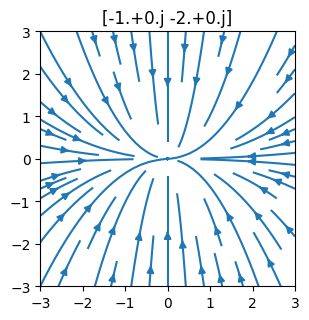

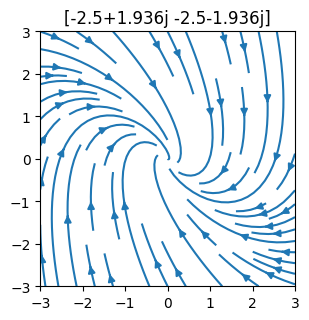

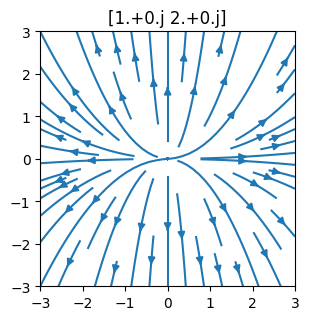

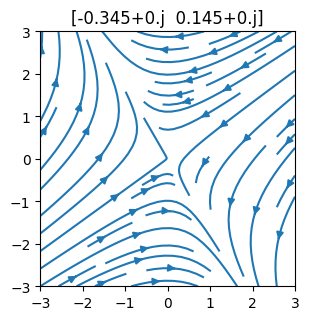

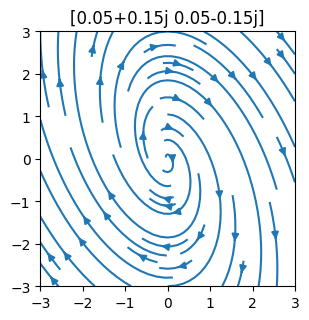

In [7]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eig

# Define a range for plotting
w = 3
Y, X = np.mgrid[-w:w:100j, -w:w:100j]
x = np.row_stack([X.ravel(), Y.ravel()])

# Define a function for a linear 2D transformation
def linear_2d(x):
    """
    Perform a linear 2D transformation on the input vector or matrix x using matrix A.
    :param x: Input vector or matrix.
    :return: Transformed vector or matrix.
    """
    UV = A @ x
    if len(x.shape) == 2:
        U = UV[0, :].reshape(int(np.sqrt(x.shape[1])), int(np.sqrt(x.shape[1])))
        V = UV[1, :].reshape(int(np.sqrt(x.shape[1])), int(np.sqrt(x.shape[1])))
        return np.array([U, V])
    return UV

# A_list contains a list of matrices with different eigenvalues
for A in A_list:
    # Get the eigenvalues of the current matrix A
    eigenvalues, _ = eig(A)

    # Convert eigenvalues to a string and round to 3 decimal places for the plot title
    title = str(np.round(eigenvalues, 3))

    # Plot the phase portrait for the linear 2D transformation
    plot_phase_portrait(linear_2d(x)[0], linear_2d(x)[1], w, title)


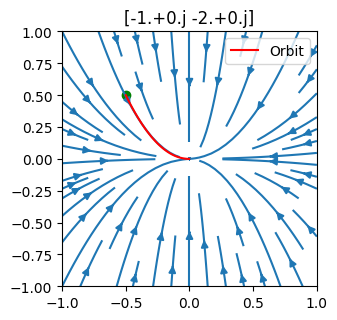

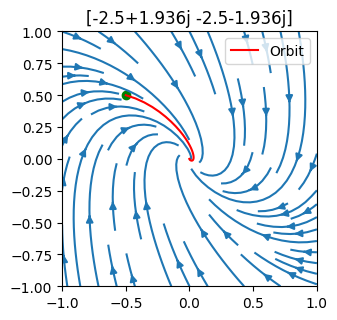

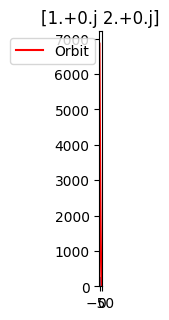

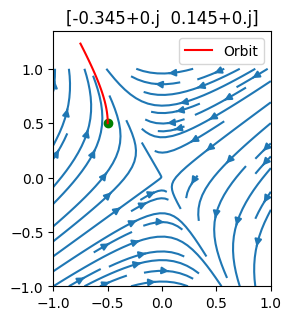

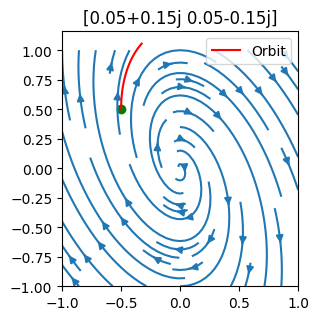

In [8]:
# Set the total time for simulation
t = 5

# Set the initial condition
y0 = np.array([-0.5, 0.5])

# Set the plotting window size
w = 1

# Iterate over matrices in A_list
for A in A_list:
    # Get the eigenvalues of the current matrix A
    eigenvalues, _ = eig(A)

    # Convert eigenvalues to a string and round to 3 decimal places for the plot title
    title = str(np.round(eigenvalues, 3))

    # Plot the phase portrait along with the trajectory using Euler's method
    plot_portrait_with_traj(linear_2d, x, t, y0, w, title)
